# Nevral stiloverføring

## Demo

Install pystiche:

In [7]:
!pip install pystiche

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 KB 748.9 kB/s eta 0:00:00a 0:00:01


Følgende demo er hentet fra: https://docs.pystiche.org/en/latest/galleries/examples/beginner/example_nst_with_pystiche.html#sphx-glr-download-galleries-examples-beginner-example-nst-with-pystiche-py

In [8]:
import pystiche
import torch

from pystiche import demo, enc, loss, optim
from pystiche.image import show_image
from pystiche.misc import get_device, get_input_image

device = get_device()
print(torch.cuda.is_available())
print(f"Device: {device}")

True
Device: cuda


Setter opp multi-layer encoder

In [9]:
multi_layer_encoder = enc.vgg19_multi_layer_encoder()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Setter opp encoder for innhold, samt loss-funksjon.

In [10]:
content_layer = "relu4_2"
content_encoder = multi_layer_encoder.extract_encoder(content_layer)
content_weight = 1e0
content_loss = loss.FeatureReconstructionLoss(content_encoder, 
                                              score_weight=content_weight)

Setter opp encoder for stil, samt loss-funksjon.

In [11]:
style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
style_weight = 1e3

def get_style_op(encoder, layer_weight):
    return loss.GramLoss(encoder, score_weight=layer_weight)

style_loss = loss.MultiLayerEncodingLoss(
     multi_layer_encoder, style_layers, get_style_op, score_weight=style_weight)

Lager en loss-funksjon som kombinerer innholds- og stil-loss. 

In [12]:
perceptual_loss = loss.PerceptualLoss(content_loss, style_loss).to(device)

Laster ned demo-bilder.

In [13]:
images = demo.images()
images.download()
size = 500

Lager en funksjon NST(stilbilde, innholdsbilde).perceptual_loss = loss.PerceptualLoss(content_loss, style_loss).to(device)

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

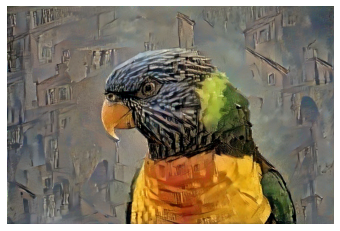

In [14]:
def NST(content_image, style_image):
    perceptual_loss.set_content_image(content_image)
    perceptual_loss.set_style_image(style_image)
    
    # set input image
    starting_point = "content"
    input_image = get_input_image(starting_point, content_image=content_image)
    
    output_image = optim.image_optimization(input_image, perceptual_loss, num_steps=500)
    return output_image

def demo_NST(content_name, style_name):
    content_image = images[content_name].read(size=size, device=device)
    style_image = images[style_name].read(size=size, device=device)
    return NST(content_image, style_image)

show_image(demo_NST("bird1", "castle"))
    
